In [1]:
%matplotlib inline

In [2]:
# !pip install tensorflow
# !pip install keras
# !pip install pydot
# !conda install -c anaconda graphviz

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

print(tf.__version__)

Using TensorFlow backend.


2.0.0


# Get and preprocess the data

In [4]:
# keras provides utility for downloading the data
# dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
# dataset_path

In [5]:
# names of the columns in the dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

# make a dataframe
raw_dataset = pd.read_csv('auto-mpg.data', names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.info() # print info about the dataframe
dataset.head() # show the first part of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
MPG             398 non-null float64
Cylinders       398 non-null int64
Displacement    398 non-null float64
Horsepower      392 non-null float64
Weight          398 non-null float64
Acceleration    398 non-null float64
Model Year      398 non-null int64
Origin          398 non-null int64
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1

In [6]:
# check if there are any missing values
dataset.isna().sum()
# 6 cars are missing the 'Horsepower' value

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [7]:
# drop cars without horsepower value
dataset = dataset.dropna()
dataset.info() # check that the cars were deleted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
MPG             392 non-null float64
Cylinders       392 non-null int64
Displacement    392 non-null float64
Horsepower      392 non-null float64
Weight          392 non-null float64
Acceleration    392 non-null float64
Model Year      392 non-null int64
Origin          392 non-null int64
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


# Visualize the data

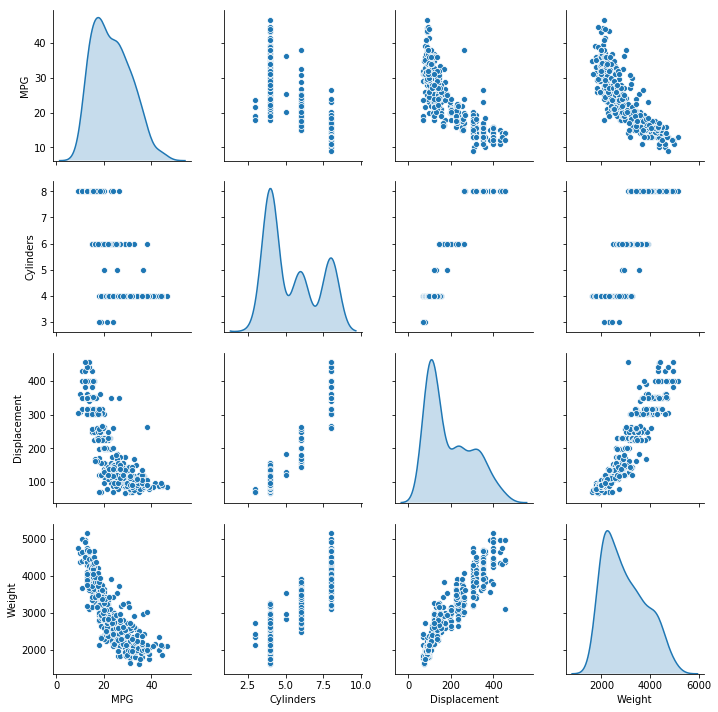

In [8]:
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

# Create the training data

In [9]:
# make a training set and test set
labels = dataset.pop('MPG')
data = dataset.values
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2, random_state=0)

In [10]:
# Normalize the data
scaler = preprocessing.StandardScaler().fit(train_data) # normalize based on the training data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

# Create the model and train it

In [11]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_data.shape[1]]),
    layers.Dense(1)
    ])

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_absolute_error', 'mean_squared_error'])

model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [19]:
# train the model, capturing the history
print(train_data.shape)
print(type(train_labels))
history = model.fit(train_data,
                    train_labels.to_numpy(),
                    validation_split = 0.2, 
                    epochs = 200
                   )

(313, 7)
<class 'pandas.core.series.Series'>
Train on 250 samples, validate on 63 samples
Epoch 1/200
250/250 [==============================] - 2s 7ms/sample - loss: 605.5564 - mean_absolute_error: 23.3694 - mean_squared_error: 605.5564 - val_loss: 634.7864 - val_mean_absolute_error: 23.7549 - val_mean_squared_error: 634.7864
Epoch 2/200
250/250 [==============================] - 0s 111us/sample - loss: 593.3560 - mean_absolute_error: 23.1104 - mean_squared_error: 593.3560 - val_loss: 621.5402 - val_mean_absolute_error: 23.4825 - val_mean_squared_error: 621.5402
Epoch 3/200
250/250 [==============================] - 0s 139us/sample - loss: 581.4618 - mean_absolute_error: 22.8591 - mean_squared_error: 581.4619 - val_loss: 608.1499 - val_mean_absolute_error: 23.2027 - val_mean_squared_error: 608.1499
Epoch 4/200
250/250 [==============================] - 0s 87us/sample - loss: 569.6465 - mean_absolute_error: 22.5967 - mean_squared_error: 569.6464 - val_loss: 594.5778 - val_mean_absolute

Epoch 35/200
250/250 [==============================] - 0s 98us/sample - loss: 108.1870 - mean_absolute_error: 8.9306 - mean_squared_error: 108.1870 - val_loss: 87.8863 - val_mean_absolute_error: 7.9465 - val_mean_squared_error: 87.8863
Epoch 36/200
250/250 [==============================] - 0s 92us/sample - loss: 99.8216 - mean_absolute_error: 8.4973 - mean_squared_error: 99.8216 - val_loss: 80.4890 - val_mean_absolute_error: 7.4943 - val_mean_squared_error: 80.4890
Epoch 37/200
250/250 [==============================] - 0s 85us/sample - loss: 92.4955 - mean_absolute_error: 8.0971 - mean_squared_error: 92.4955 - val_loss: 74.0730 - val_mean_absolute_error: 7.0768 - val_mean_squared_error: 74.0729
Epoch 38/200
250/250 [==============================] - 0s 86us/sample - loss: 86.0283 - mean_absolute_error: 7.7491 - mean_squared_error: 86.0283 - val_loss: 68.6006 - val_mean_absolute_error: 6.7211 - val_mean_squared_error: 68.6006
Epoch 39/200
250/250 [==============================] - 0s

Epoch 70/200
250/250 [==============================] - 0s 88us/sample - loss: 29.2682 - mean_absolute_error: 4.2863 - mean_squared_error: 29.2682 - val_loss: 23.3406 - val_mean_absolute_error: 3.9557 - val_mean_squared_error: 23.3406
Epoch 71/200
250/250 [==============================] - 0s 88us/sample - loss: 28.5598 - mean_absolute_error: 4.2282 - mean_squared_error: 28.5598 - val_loss: 22.7059 - val_mean_absolute_error: 3.9043 - val_mean_squared_error: 22.7059
Epoch 72/200
250/250 [==============================] - 0s 89us/sample - loss: 27.9148 - mean_absolute_error: 4.1786 - mean_squared_error: 27.9148 - val_loss: 22.1171 - val_mean_absolute_error: 3.8543 - val_mean_squared_error: 22.1171
Epoch 73/200
250/250 [==============================] - 0s 89us/sample - loss: 27.2842 - mean_absolute_error: 4.1287 - mean_squared_error: 27.2842 - val_loss: 21.5371 - val_mean_absolute_error: 3.8038 - val_mean_squared_error: 21.5371
Epoch 74/200
250/250 [==============================] - 0s 8

Epoch 105/200
250/250 [==============================] - 0s 96us/sample - loss: 16.0727 - mean_absolute_error: 3.0485 - mean_squared_error: 16.0727 - val_loss: 12.3250 - val_mean_absolute_error: 2.8094 - val_mean_squared_error: 12.3250
Epoch 106/200
250/250 [==============================] - 0s 121us/sample - loss: 15.8794 - mean_absolute_error: 3.0246 - mean_squared_error: 15.8794 - val_loss: 12.2051 - val_mean_absolute_error: 2.7876 - val_mean_squared_error: 12.2051
Epoch 107/200
250/250 [==============================] - 0s 99us/sample - loss: 15.7114 - mean_absolute_error: 3.0026 - mean_squared_error: 15.7114 - val_loss: 12.0896 - val_mean_absolute_error: 2.7662 - val_mean_squared_error: 12.0896
Epoch 108/200
250/250 [==============================] - 0s 88us/sample - loss: 15.5438 - mean_absolute_error: 2.9806 - mean_squared_error: 15.5437 - val_loss: 11.9697 - val_mean_absolute_error: 2.7421 - val_mean_squared_error: 11.9697
Epoch 109/200
250/250 [==============================] 

Epoch 140/200
250/250 [==============================] - 0s 90us/sample - loss: 11.9433 - mean_absolute_error: 2.4916 - mean_squared_error: 11.9433 - val_loss: 9.7649 - val_mean_absolute_error: 2.2493 - val_mean_squared_error: 9.7649
Epoch 141/200
250/250 [==============================] - 0s 95us/sample - loss: 11.8636 - mean_absolute_error: 2.4783 - mean_squared_error: 11.8636 - val_loss: 9.7121 - val_mean_absolute_error: 2.2391 - val_mean_squared_error: 9.7121
Epoch 142/200
250/250 [==============================] - 0s 103us/sample - loss: 11.7878 - mean_absolute_error: 2.4674 - mean_squared_error: 11.7878 - val_loss: 9.6646 - val_mean_absolute_error: 2.2280 - val_mean_squared_error: 9.6646
Epoch 143/200
250/250 [==============================] - 0s 96us/sample - loss: 11.7177 - mean_absolute_error: 2.4569 - mean_squared_error: 11.7177 - val_loss: 9.6523 - val_mean_absolute_error: 2.2211 - val_mean_squared_error: 9.6523
Epoch 144/200
250/250 [==============================] - 0s 102

Epoch 175/200
250/250 [==============================] - 0s 85us/sample - loss: 9.9640 - mean_absolute_error: 2.1904 - mean_squared_error: 9.9640 - val_loss: 8.7064 - val_mean_absolute_error: 2.0412 - val_mean_squared_error: 8.7064
Epoch 176/200
250/250 [==============================] - 0s 95us/sample - loss: 9.9121 - mean_absolute_error: 2.1826 - mean_squared_error: 9.9121 - val_loss: 8.6871 - val_mean_absolute_error: 2.0360 - val_mean_squared_error: 8.6871
Epoch 177/200
250/250 [==============================] - 0s 91us/sample - loss: 9.8799 - mean_absolute_error: 2.1779 - mean_squared_error: 9.8799 - val_loss: 8.6528 - val_mean_absolute_error: 2.0319 - val_mean_squared_error: 8.6528
Epoch 178/200
250/250 [==============================] - 0s 89us/sample - loss: 9.8405 - mean_absolute_error: 2.1705 - mean_squared_error: 9.8405 - val_loss: 8.6546 - val_mean_absolute_error: 2.0290 - val_mean_squared_error: 8.6546
Epoch 179/200
250/250 [==============================] - 0s 92us/sample 

In [20]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

loss  mean_absolute_error  mean_squared_error    val_loss  \
0  605.556373            23.369377          605.556396  634.786427   
1  593.355987            23.110443          593.355957  621.540172   
2  581.461830            22.859072          581.461853  608.149887   
3  569.646502            22.596685          569.646423  594.577805   
4  557.303287            22.332552          557.303284  581.023022   

   val_mean_absolute_error  val_mean_squared_error  epoch  
0                23.754915              634.786438      0  
1                23.482523              621.540161      1  
2                23.202717              608.149902      2  
3                22.922073              594.577820      3  
4                22.635487              581.023071      4

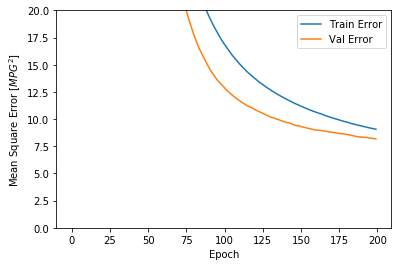

In [21]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

In [23]:
loss, mae, mse = model.evaluate(test_data, test_labels.to_numpy(), verbose=0)
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

Testing set Mean Abs Error:  1.97 MPG


# Add additional layers to the model

In [24]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[train_data.shape[1]]),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
    ])

model.compile(loss='mean_squared_error',
            optimizer='adam',
            metrics=['mean_absolute_error', 'mean_squared_error'])

model.summary()
# SVG(model_to_dot(model).create(prog='dot', format='svg'))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


In [25]:
# train the model, capturing the history
print(train_data.shape)
history = model.fit(train_data,
                    train_labels,
                    validation_split = 0.2, 
                    epochs = 200
                   )

(313, 7)


ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

loss  mean_absolute_error  mean_squared_error    val_loss  \
0  605.556373            23.369377          605.556396  634.786427   
1  593.355987            23.110443          593.355957  621.540172   
2  581.461830            22.859072          581.461853  608.149887   
3  569.646502            22.596685          569.646423  594.577805   
4  557.303287            22.332552          557.303284  581.023022   

   val_mean_absolute_error  val_mean_squared_error  epoch  
0                23.754915              634.786438      0  
1                23.482523              621.540161      1  
2                23.202717              608.149902      2  
3                22.922073              594.577820      3  
4                22.635487              581.023071      4

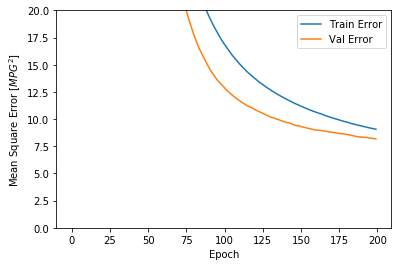

In [27]:
# function to plot the error
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mean_squared_error'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mean_squared_error'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)

In [28]:
loss, mae, mse = model.evaluate(test_data, test_labels, verbose=0) # evaluate the model
print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae)) # print the average error for the test set

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'pandas.core.series.Series'>

# Get predictions

In [29]:
preds = model.predict(test_data) # get predictions using the model we built
preds = [preds[i][0] for i in range(len(preds))]
print('Actual : Prediction')
for actual, pred in zip(test_labels, preds): # print numbers for comparison
    print(actual, ' :', '{:5.1f}'.format(pred))

Actual : Prediction
28.0  :   0.2
22.3  :   0.1
12.0  :   0.4
38.0  :   0.2
33.8  :   0.6
19.4  :  -0.0
38.1  :   0.7
30.0  :   0.5
20.0  :   0.1
20.0  :   0.3
27.0  :   0.3
16.5  :   0.3
24.5  :   0.1
11.0  :   0.4
16.9  :   0.2
33.7  :   0.6
21.6  :   0.1
14.0  :   0.3
26.0  :   0.2
28.4  :   0.0
13.0  :   0.2
16.0  :   0.1
20.0  :   0.2
25.0  :  -0.0
41.5  :   0.3
14.0  :   0.4
25.8  :   0.1
25.1  :   0.1
20.0  :   0.0
17.0  :   0.3
20.0  :   0.2
31.6  :   0.6
22.0  :   0.2
26.0  :   0.3
21.0  :   0.1
29.8  :   0.5
31.0  :   0.3
13.0  :   0.4
16.0  :   0.3
14.0  :   0.4
15.0  :   0.4
44.6  :   0.6
31.3  :   0.6
16.0  :   0.3
29.0  :   0.2
16.0  :   0.3
29.0  :   0.1
13.0  :   0.3
17.5  :   0.2
18.0  :   0.1
26.0  :   0.3
15.0  :   0.4
10.0  :   0.4
22.0  :   0.2
34.3  :   0.3
30.7  :   0.3
20.2  :  -0.0
22.0  :   0.0
33.0  :   0.5
21.0  :   0.2
22.0  :   0.1
24.0  :   0.3
31.5  :   0.3
15.0  :   0.4
26.0  :   0.3
16.0  :   0.1
14.0  :   0.4
27.0  :   0.1
25.0  :   0.2
40.8  :   0.6


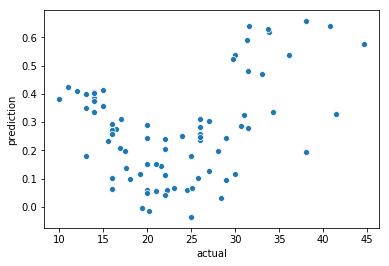

In [30]:
results = pd.DataFrame({'actual':test_labels, 'prediction':preds})
sns.scatterplot(x='actual', y='prediction', data=results)

# References

https://www.tensorflow.org/tutorials/keras/basic_regression

https://keras.io/visualization/

https://github.com/AppliedDataSciencePartners/DeepReinforcementLearning/issues/3#issuecomment-475855747